<a href="https://colab.research.google.com/github/EleonoraProietti/Master-Data-Analytics---ProfessionAI---Python-with-Google-Colab/blob/main/Analysis_of_Airplane_Crashes_from_1919_to_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Analisi dei disastri aerei dal 1919 al 2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

aviation_accidents = pd.read_csv('aviation-accidents.csv')
aviation_accidents.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [ ]:
aviation_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
aviation_accidents.isna().sum()

,0
date,0
type,0
registration,1548
operator,4
fatalities,3938
location,948
country,0
cat,0
year,0


In [ ]:
# Remove registration column 2
aviation_accidents_clean = aviation_accidents.drop(aviation_accidents.columns[2], axis=1)

# Replace 'date unk.' values in 'date' column with NaN
aviation_accidents_clean['date'] = aviation_accidents_clean['date'].replace('date unk.', np.nan)

# Convert the 'date' column to datetime objects, coercing errors
aviation_accidents_clean['date'] = pd.to_datetime(aviation_accidents_clean['date'], errors='coerce')

# Replace the NaN in Location with unknown
aviation_accidents_clean['location'] = aviation_accidents_clean['location'].fillna('unknown')

# Replace the NaN in Fatalities with 0
aviation_accidents_clean['fatalities'] = aviation_accidents_clean['fatalities'].fillna(0)

aviation_accidents_clean.info()

/tmp/ipython-input-438201829.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation_accidents_clean['date'] = pd.to_datetime(aviation_accidents_clean['date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        23408 non-null  datetime64[ns]
 1   type        23967 non-null  object        
 2   operator    23963 non-null  object        
 3   fatalities  23967 non-null  object        
 4   location    23967 non-null  object        
 5   country     23967 non-null  object        
 6   cat         23967 non-null  object        
 7   year        23967 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.5+ MB


####1. In quale nazione si sono verificatipiù incidenti?

In [ ]:
# First Country for accidents
country_accidents = aviation_accidents_clean['country'].value_counts().idxmax()
country_accidents

'USA'

In [ ]:
# Number of aviation accidents in the USA

num_accidents_USA = aviation_accidents_clean['country'].value_counts().max()
num_accidents_USA

4377

In [ ]:
# Firts ten Country for aviation accidents
aviation_accidents_clean = aviation_accidents_clean[aviation_accidents_clean['country'] != 'Unknown country']
accidents_for_country = aviation_accidents_clean['country'].value_counts()
accidents_for_country.head(10)

,count
country,
USA,4377
Russia,1422
U.K.,837
Canada,826
India,700
Brazil,609
France,550
Germany,516
China,514


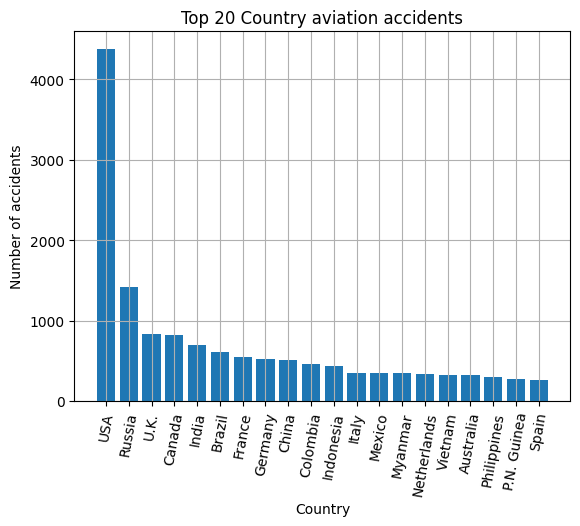

In [ ]:
# Bar chart

plt.bar(accidents_for_country.index[:20], accidents_for_country.values[:20])
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.title('Top 20 Country aviation accidents')
plt.xticks(rotation = 80)
plt.grid()
plt.show()

#### 2. In quali giorni avvengono più di frequente gli incidenti?

In [ ]:
# Count the day
aviation_accidents_clean['day_of_week'] = aviation_accidents_clean['date'].dt.day_name()
day_count = aviation_accidents_clean['day_of_week'].value_counts()

day_count = aviation_accidents_clean['day_of_week'].value_counts().reindex()
day_count.sort_values(ascending = False)

# More plane crashes occur on Fridays

,count
day_of_week,
Friday,3584
Thursday,3407
Wednesday,3386
Tuesday,3335
Monday,3211
Saturday,3088
Sunday,2673


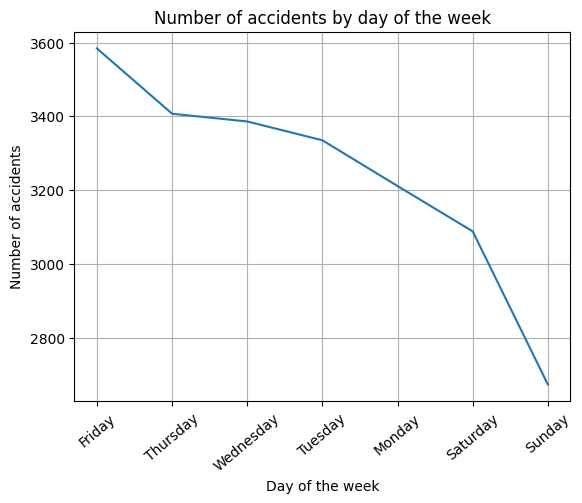

In [ ]:
# Plot char

plt.plot(day_count.index, day_count.values)
plt.xlabel('Day of the week')
plt.ylabel('Number of accidents')
plt.title('Number of accidents by day of the week')
plt.grid()
plt.xticks(rotation = 40)
plt.show()

#### 3. Quali sono gli operatori aerei meno e più sicuri?

In [ ]:
# The air operator with the most air accidents
operation = aviation_accidents_clean['operator'].value_counts().idxmax()
operation

'USAAF'

In [ ]:
# Air operator with more accidents
aviation_accidents_clean = aviation_accidents_clean[aviation_accidents_clean['operator'] != ' ']
operators = aviation_accidents_clean['operator'].value_counts()
operators.head()

,count
operator,
USAAF,2170
USAF,1066
RAF,895
US Navy,709
German AF,497


In [ ]:
# Air operators with fewer accidents
safest_operators = operators.sort_values(ascending=True).head(20)
safest_operators

,count
operator,
"Aeroflot, MAG SPiVS",1
Hunting Aerosurveys,1
ARTOP,1
Corsair Aviation Holdings,1
Brit Air,1
Comav Aviation,1
Aeroklub KVS,1
Cielos del Peru,1
Ruiban and Duran,1


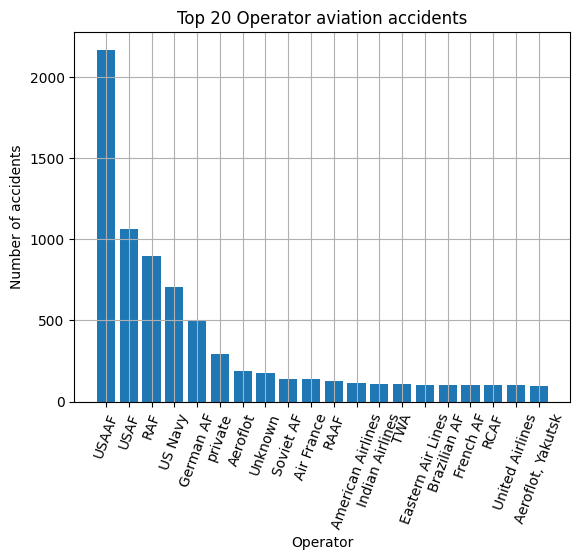

In [ ]:
# Bar chart
plt.bar(operators.index[:20], operators.values[:20])
plt.xlabel('Operator')
plt.ylabel('Number of accidents')
plt.title('Top 20 Operator aviation accidents')
plt.xticks(rotation = 70)
plt.grid()
plt.show()

#### 4. Quali velivoli hanno causato più e meno morti

In [ ]:
# Wich aircraft caused the most deaths
death_aircraft = aviation_accidents_clean['type'].value_counts().idxmax()
death_aircraft

'Douglas C-47A (DC-3)'

In [ ]:
# How many deaths did it cause
num_death_aircraft = aviation_accidents_clean['type'].value_counts().max()
num_death_aircraft

1770

In [ ]:
# Wich aircraft caused the fewes deaths
safest_aircraft = aviation_accidents_clean['type'].value_counts().idxmin()
safest_aircraft

'Boeing 777-233LR'

In [ ]:
# How many deaths did it cause
safest_aircraft = aviation_accidents_clean['type'].value_counts().min()
safest_aircraft

1

#### 5. Cosa è successo dopo l'11 settembre 2001

In [ ]:
# Number of accidendts after 11 september 2001

accidents_after_11sept2001 = aviation_accidents_clean[aviation_accidents_clean['date'] > pd.to_datetime('2001-09-11')]
num_accidents_after_11sept2001 = len(accidents_after_11sept2001_df)

num_accidents_after_11sept2001

4505

In [ ]:
# Ranking of countries with the most air accidents after 11 september 2001

accidents_after_11sept2001 = aviation_accidents_clean[aviation_accidents_clean['date'] > pd.to_datetime('2001-09-11')]
country_after_11sept2001 = accidents_after_11sept2001[accidents_after_11sept2001['date']> '2001-09-11']
country_after_11sept2001 = country_after_11sept2001['country'].value_counts()
country_after_11sept2001.head(10)

,count
country,
USA,1044
Canada,251
Russia,230
Indonesia,145
Brazil,122
Venezuela,117
D.R. Congo,116
Mexico,109
U.K.,98


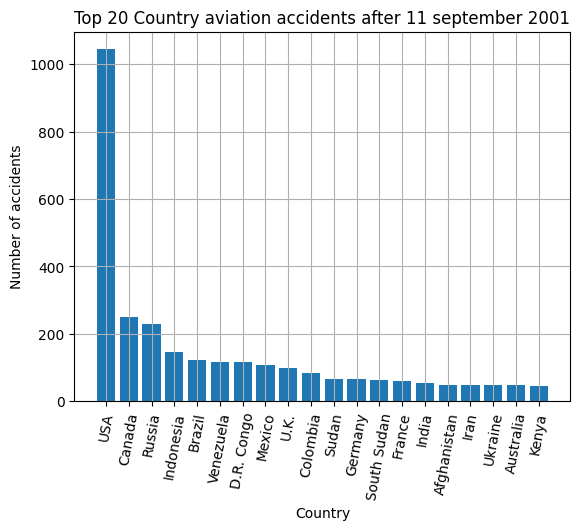

In [ ]:
# Bar chart
plt.bar(country_after_11sept2001.index[:20], country_after_11sept2001.values[:20])
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.title('Top 20 Country aviation accidents after 11 september 2001')
plt.xticks(rotation = 80)
plt.grid()
plt.show()

#### Map of aviation accidents

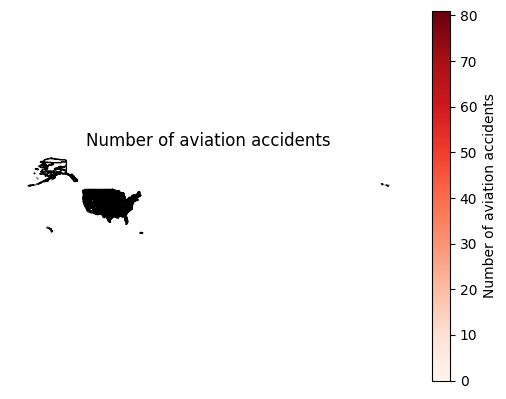

In [ ]:
import geopandas as gpd
url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
countries = gpd.read_file(url)

# Count the number of accidents per country in the cleaned data
accidents_per_country_count = aviation_accidents_clean['country'].value_counts().reset_index()
accidents_per_country_count.columns = ['country', 'accidents']

# Merge the countries GeoDataFrame with the accident counts
merge = countries.merge(accidents_per_country_count, left_on='NAME', right_on='country', how='left')

# Fill NaN values in the 'accidents' column with 0
merge['accidents'] = merge['accidents'].fillna(0)

fig, ax = plt.subplots(1, 1)

merge.plot(column='accidents', ax=ax, legend=True, cmap='Reds', edgecolor='black', legend_kwds={'label': 'Number of aviation accidents'})
ax.set_title('Number of aviation accidents')
ax.axis('off')
plt.show()